# Predicitive Analytics Coursework
## Word Count 1612 words

# Task and Business Application

Online shopping is growing rapidly day by day and has proven to be vital during the coronavirus pandemic as most physical stores were forced to be shut due to the lockdown restrictions imposed by nations globally. Businesses had to be swift and quickly adapt to selling their goods and services on online platforms and as a result there has been a huge surge in consumers shopping online. 

However, a big problem almost all businesses face when using online stores, is the ability to obtain a decent sales conversion rate of the users who view their sites. To tackle this issue, we are going to use machine learning to predict if customer will make a purchase or not by using users’ activity as parameters for the machine learning algorithms. The aim of this study is to identify possible recommendations a business can use to increase its conversion rate. The dataset was obtained from the UCI repository (https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset).

Link to OneDrive
https://liveuclac-my.sharepoint.com/:f:/g/personal/uceisir_ucl_ac_uk/El5cAej8bA1PjE7d8LXWYiQBvU8kDwhFrNYeSVYiWi2syQ?e=5OnZkN

# Setup

In [195]:
#Let's import the neccessarry modules  
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
# To make this notebook's output stable across runs
np.random.seed(42)

#To plot pretty figures 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Loading the Dataset

In [196]:
#Let's take look at the dataset and variables we have
online_shopping = pd.read_csv('/Users/User/Desktop/Predictive Analytics/Individual assignment/Online Shopper/online_shoppers_intention.csv')
online_shopping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [197]:
#Let's check on the data type of the columns
online_shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Now that we have managed to open and view the dataset. Let’s take a look at what each of the columns in the dataset represent

Administrative - This metric indicates number of administrative pages the user has visited

Administrative _Duration - This is the amount of time the user has spent on administrative pages

Informational - This is the number of times the user has visited pages that are categorized as informational

Informational _Duration - This is the amount of time the user has spent on informational pages

Product Related - This is the number of times the user has visited pages that are categorized as product related

Product Related _ Duration - This is the amount of time the user has spent on product related pages

Bounce Rates - This metric measures the percentage of user who land on the website but leave without clicking any of the buttons on the page

Exit  Rates - This metric measures the number of times a visitor has left a site from single page

Page Values - Is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction. 

Special Day - This metric measure if there are any special occasions nearing upcoming as the user visits the site. For instance, Christmas might be 3 days away from the time the user visits our site.

Month- The month in which the user is accessing our page

Operating Systems - Type of OS from which the user is accessing our site. However, instead of having names the dataset already has integers as assigned to the respective OS.

Browser - Type of browser from which the user is accessing our site. However, instead of having names the dataset already has integers as assigned to the respective browsers.

Region - Region from which the user is accessing our site. However, instead of having names the dataset already has integers as assigned to the respective region.

Traffic - Type of traffic the user is categorized as. For instance, the user could've found us on search engines or directly search for our site or came from a referral site such as a Youtuber.

Visitor - Users are categorized into 3 groups. The groups are New Visitor, Returning Visitor or Other.

Weekend - This is a Boolean variable indicating whether the user accessed our site on a weekend or not.

Revenue - This is a Boolean variable whether the user made a purchase or not


In [198]:
#Let's check the summary statistics
online_shopping.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


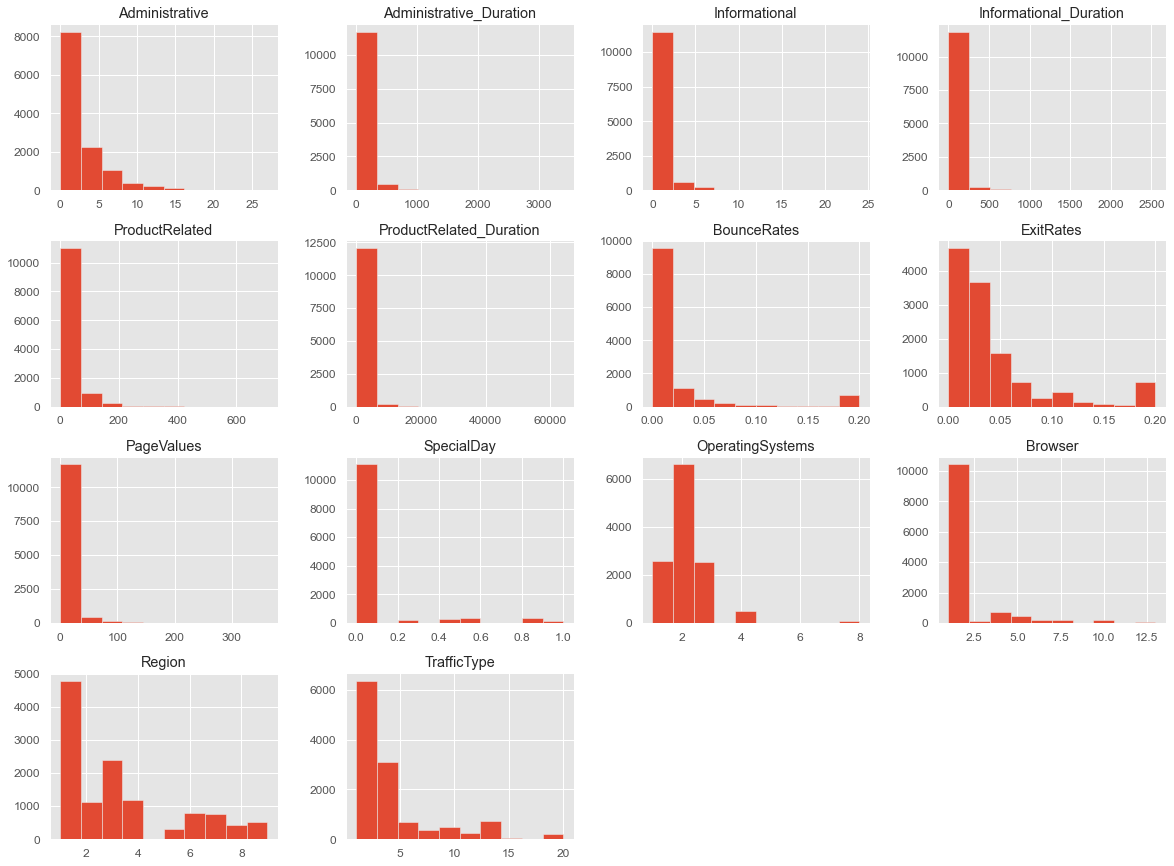

In [199]:
#Let's plot of a histogram of the plots we have

#We exclude the boolean strings first as we shall encode them later
attributes = ["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated"
         ,"ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay",
          "OperatingSystems", "Browser","Region","TrafficType"]
online_shopping.hist(attributes,bins=10, figsize=(20,15))
plt.style.use('ggplot')
plt.show()

By plotting the histogram we can see that a lot of the histograms are skewed to the left. As a result it maybe difficult four machine learning algorithim to detect any patterns. Transformation shall be done later on.

## Exploratory Data Analysis

Now from this section onwards lets take a look at some of the variables to identify some trends that we can explore later on. Firstly, let see how many users actually complete a purchase on our site.

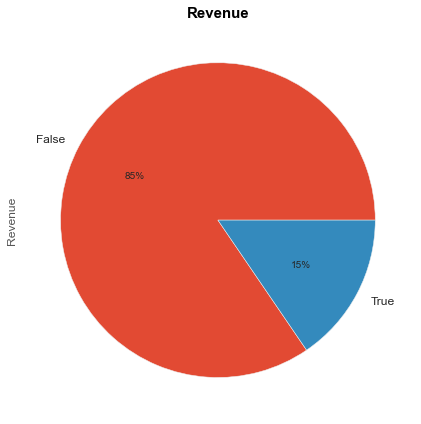

In [200]:
#We plot a pie chart to see a breakdown of the sales

#Use the seaborn package 
import seaborn as sns

#Setting up variable for the plotting
revenue_online = online_shopping['Revenue'].value_counts().plot.pie(figsize=(6,6), autopct='%1.0f%%')

#Formatting of the plot
plt.title('Revenue',fontweight='bold',size=15,color='black')
plt.style.use('ggplot') 
plt.tight_layout() #To plot our figure neatly
plt.show()

Interestingly, we can observe that most customers fail to complete a transaction and only 15% of transactions are completed.  This is very normal for most ecommerce stores as they tend to get high volumes of traffic but most of the traffic don’t end up converting into a sale. Another insight that can be taken from this is that the dataset is going to be skewed to no purchase being made.

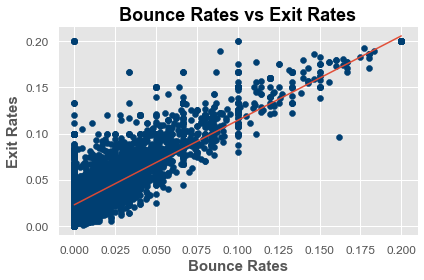

In [201]:
#Analysis of Exit Rates and Bounce Rates

#To plot the regression line 
#(adapted from https://pythonprogramming.net/how-to-program-best-fit-line-machine-learning-tutorial/)
from statistics import mean

#Define our varibales
xs = online_shopping["BounceRates"] 
ys = online_shopping["ExitRates"]

#Function to get regression line
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

#Creating the scatter plot
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line, alpha = 10) #include the regression line

#Formatting of the plot
plt.xlabel('Bounce Rates',fontweight='bold',size=15)
plt.ylabel('Exit Rates',fontweight='bold', size=15)
plt.title('Bounce Rates vs Exit Rates',fontweight='bold',size=18,color='black')
plt.style.use('ggplot')
plt.tight_layout() #To plot our figure neatly
plt.show()



We can see that Exit Rate and Bounce Rate seem to be highly correlated, this likely due to the fact that both metrics are ultimate used to measure instances when a user leaves our site. It’s important that we keep these metrics well balanced by ensuring users don’t get bombarded with irrelevant content and that they are able to navigate around out site with ease and that the same time be engaged.

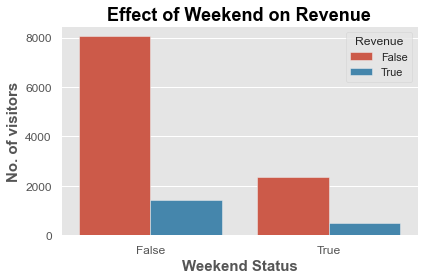

In [202]:
#Analysis of sales on the weekend

#Setting up variable for the plotting
weekend_plot= sns.countplot(x='Weekend',hue='Revenue',data=online_shopping)

#Formatting of the plot
plt.xlabel('Weekend Status',fontweight='bold',size=15)
plt.ylabel('No. of visitors',fontweight='bold', size=15)
plt.title('Effect of Weekend on Revenue',fontweight='bold',size=18,color='black')
plt.style.use('ggplot')
plt.tight_layout() #To plot our figure neatly
plt.show()


From this bar graph we can see that the more sales are made on the weekdays as opposed to the weekends. This likely due to the fact that users maybe spending their weekends on sites that related to entertainment or leisure as opposed to shopping sites.  

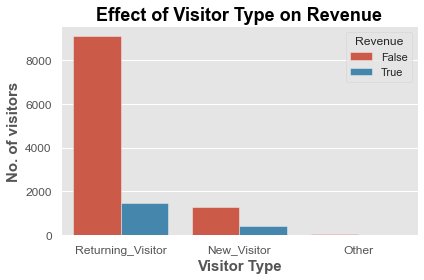

In [203]:
#Impact of Visitor Type

#Setting up variable for the plotting
visitor_type_plot= sns.countplot(x='VisitorType',hue='Revenue',data=online_shopping)

#Formatting of the plot
plt.xlabel('Visitor Type',fontweight='bold',size=15)
plt.ylabel('No. of visitors',fontweight='bold', size=15)
plt.title('Effect of Visitor Type on Revenue',fontweight='bold',size=18,color='black')
plt.style.use('ggplot')
plt.tight_layout() #To plot our figure neatly
plt.show()


We can observe that returning customers tend to make more sales than new visitors. This is probably because the user is familiar with the product or service and feel confident our store would likely meet their expectation.  

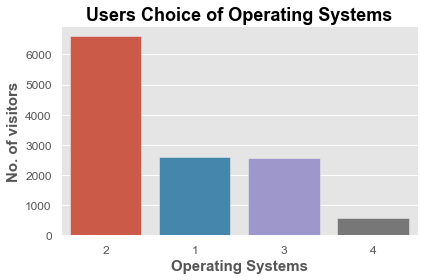

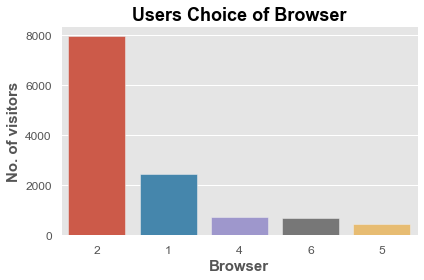

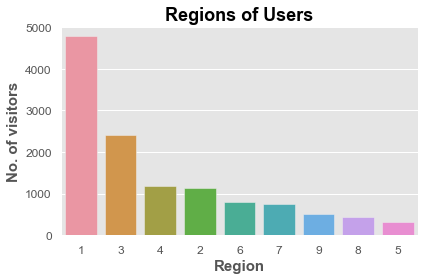

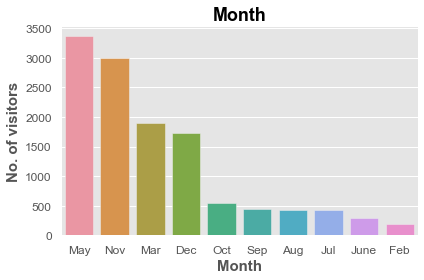

In [204]:
##User choice of Operating System

#Create dummy dataframe  as we don't want to distrub our main dataframe
dummy_frame =online_shopping.copy()

#We replace the operating systems with very low counts and group them together as operating system no.4
dummy_frame['OperatingSystems'] = dummy_frame['OperatingSystems'].replace([5,6,7,8],4)

#Setting up variable for the plotting
user_operating_system= sns.countplot(x =dummy_frame['OperatingSystems'], order =dummy_frame['OperatingSystems'].value_counts().index)

#Formatting of the plot
plt.xlabel('Operating Systems',fontweight='bold',size=15)
plt.ylabel('No. of visitors',fontweight='bold', size=15)
plt.title('Users Choice of Operating Systems',fontweight='bold',size=18,color='black')
plt.style.use('ggplot')
plt.tight_layout()
plt.show()

##User choice of Browser

#We use the dummy dataframe again
#We replace the browser with very low counts and group them together as browser no.6
dummy_frame['Browser'] = dummy_frame['Browser'].replace([10,8,3,13,7,12,11,9],6)

#Setting up variable for the plotting
user_browser= sns.countplot(x =dummy_frame['Browser'], order =dummy_frame['Browser'].value_counts().index)

#Formatting of the plot
plt.xlabel('Browser',fontweight='bold',size=15)
plt.ylabel('No. of visitors',fontweight='bold', size=15)
plt.title('Users Choice of Browser',fontweight='bold',size=18,color='black')
plt.style.use('ggplot')
plt.tight_layout()
plt.show()

##Region

#Setting up variable for the plotting
user_region= sns.countplot(x =online_shopping['Region'], order =online_shopping['Region'].value_counts().index)

plt.xlabel('Region',fontweight='bold',size=15)
plt.ylabel('No. of visitors',fontweight='bold', size=15)
plt.title('Regions of Users',fontweight='bold',size=18,color='black')
plt.style.use('ggplot')
plt.tight_layout()
plt.show()

##Month

#Setting up variable for the plotting
user_month= sns.countplot(x =online_shopping['Month'], order =online_shopping['Month'].value_counts().index)

#Formatting of the plot
plt.xlabel('Month',fontweight='bold',size=15)
plt.ylabel('No. of visitors',fontweight='bold', size=15)
plt.title('Month',fontweight='bold',size=18,color='black')
plt.style.use('ggplot')
plt.tight_layout()
plt.show()

For operating systems and browsers, it’s quite evident that users are concentrated within certain browsers and operating systems. They are likely to be concentrated into the most popular systems such iOS, Android, Chrome, and Safari. However, in the dataset users were had wide category of browers and operating systems but some of them had very little users, so to make the visualizations clearer, the smaller systems were grouped together and represented as the smallest bar in the respective operating system and browser bar charts. Moreover, we can see that a lot of our users from region 1 and there seems to be surge in users in the month of May.

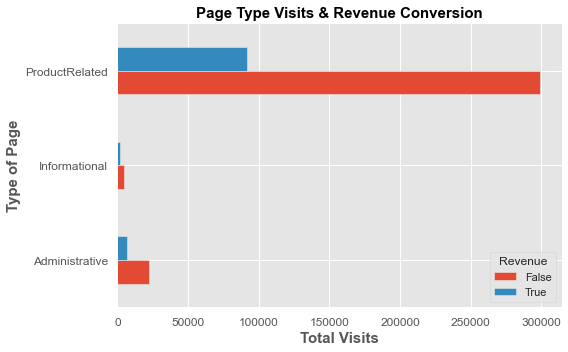

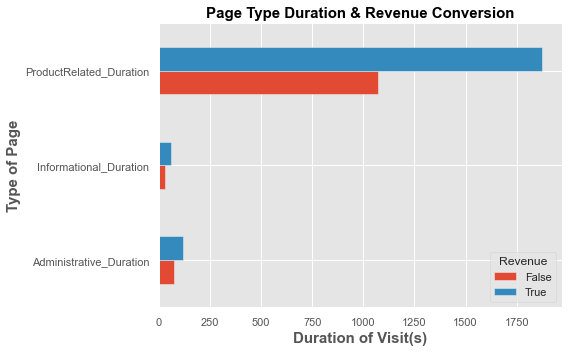

In [205]:
##In terms of Page Type Visitis

#Setting up variable for the plotting
Page_Type = pd.pivot_table(online_shopping,values=['Administrative','Informational','ProductRelated'],index='Revenue',aggfunc='sum')
page.T.plot(kind='barh',figsize=(8,5))


#Formating of the plot
sns.set_theme(style="darkgrid")
plt.title('Page Type Visits & Revenue Conversion',fontweight='bold',size=15,color='black')
plt.ylabel('Type of Page',fontweight='bold', size=15)
plt.xlabel('Total Visits',fontweight='bold', size=15)
plt.style.use('ggplot')
plt.tight_layout()
plt.show()

##In terms of Duration

#Setting up variable for the plotting
Duration = pd.pivot_table(online_shopping,values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],index='Revenue').T.plot(kind='barh',figsize=(8,5),)

#Formating of the plot
sns.set_theme(style="darkgrid")
plt.title('Page Type Duration & Revenue Conversion',fontweight='bold',size=15,color='black')
plt.ylabel('Type of Page',fontweight='bold', size=15)
plt.xlabel('Duration of Visit(s)',fontweight='bold', size=15)
plt.style.use('ggplot')
plt.tight_layout()
plt.show()


We can see that Product related product related pages are where most customers spend time and this eventually leads to more conversion to sales. This is likely to be a key feature in the modelling process later on. However, to make sure we get the best possible feature for our model, we shall plot a correlation matrix to see which are most correlated.

Text(0.5, 1.0, 'HeatMap of Correlation')

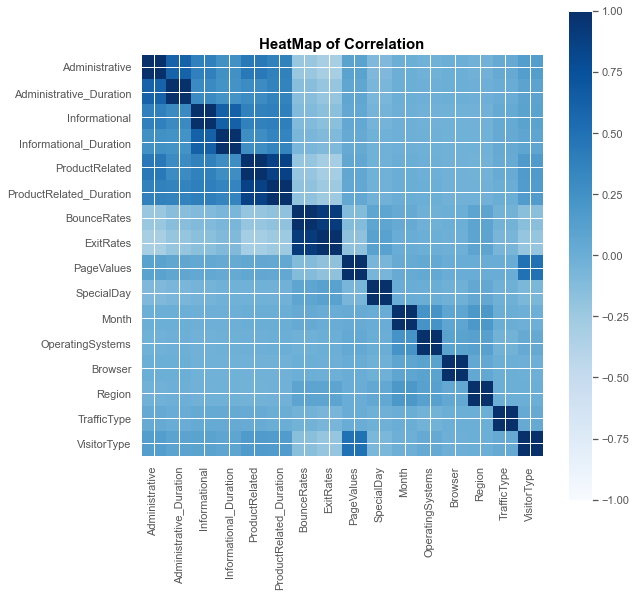

In [206]:
#Correlation Matrix for Attributes
shopping_corr = online_shopping.corr()

#Formatting of the plot
n_ticks = len(online_shopping.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), online_shopping.columns, rotation='vertical')
plt.yticks(range(n_ticks), online_shopping.columns)
plt.colorbar(plt.imshow(shopping_corr, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
plt.title('HeatMap of Correlation',fontweight='bold',size=15,color='black')

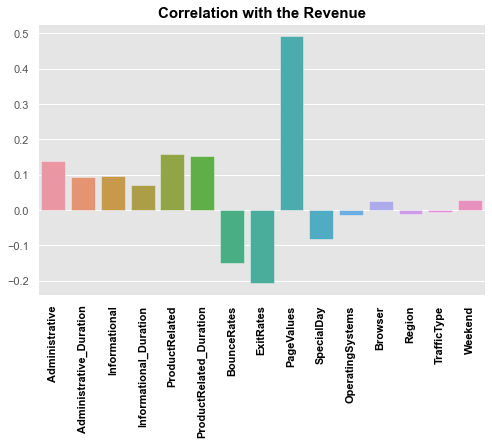

In [207]:
#Let's take a closer look and see which features correlate with revenue

#Variable for plotting
revenue_corr = online_shopping.corr()['Revenue'] 

#Setting up the plot
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = revenue_corr[:-1].index, y = revenue_corr[:-1].values,ax=ax)

#Formating the plot
plt.title('Correlation with the Revenue',fontweight='bold',size=15,color='black')
plt.xticks(rotation = 90,fontweight='bold',size=11,color='black')
plt.show()


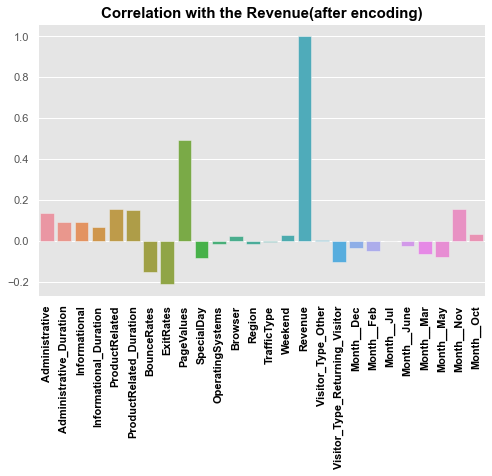

In [208]:
#Create Dummies to see if they have any impact

#Create dummy dataframe  as we don't want to distrub our main dataframe
dummy=online_shopping.copy()

#Encoding the neccessary variables
visitor_encoded = pd.get_dummies(dummy['VisitorType'], prefix='Visitor_Type', drop_first = True)
month_encoded = pd.get_dummies(dummy['Month'], prefix='Month_', drop_first = True)
shopping_clean_merged = pd.concat([dummy, visitor_encoded,month_encoded], axis=1).drop(['VisitorType','Month'], axis=1)

#Variable for plotting
revenue_corr = shopping_clean_merged.corr()['Revenue'] 

#Setting up the plot
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = revenue_corr[:-1].index, y = revenue_corr[:-1].values,ax=ax).set_title('Correlation with the Revenue')

#Formating the plot
plt.title('Correlation with the Revenue(after encoding)',fontweight='bold',size=15,color='black')
plt.xticks(rotation = 90,fontweight='bold',size=11,color='black')
plt.show()


We can see from the above that certain months and retruing visitor type do have some correlation with the revenue and therefore these should be encoded and used on the modelling stage later on.

Based on the exploratory data analysis done we can see that certain attributes have very little correlation with the revenue. The attributes that do have a significant correlation are the ones that are associated with the pages of the site. Additionally, we have also seen that a lot of the visitors don't complete a sale so we are likely to expect some bias in our modelling. In order to overcome this, we should take a stratified sample or take a SMOTE approach. In the next part of this report we shall we look into preparing the dataset for modelling.

## Preparing the Data

In [209]:
#Check is there is any missing data
missing = online_shopping.isnull().sum()
print(missing)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


The data seems to be clean and we have no missing data so there is no need to drop or impute any values

In [210]:
#Splitting the dataset
X = online_shopping.drop('Revenue', axis=1)

Y = online_shopping['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=42, test_size=0.2)

Based on the exploratory data analysis done we observed that some features had very little correlation, so as a result for the modelling section these features will be dropped. It is worth noting that the feature enigineering is being done after the split because we want to avoid any bias that would be created by data leakages.

In [211]:
#Dropping features that have little correlation
shopping_training_drop = X_train.drop(['Browser','OperatingSystems','Region','TrafficType','Weekend','SpecialDay'], axis=1)
shopping_training_drop.head()

shopping_test_drop = X_test.drop(['Browser','OperatingSystems','Region','TrafficType','Weekend','SpecialDay'], axis=1)
shopping_test_drop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,VisitorType
8916,3,142.500000,0,0.00,48,1052.255952,0.004348,0.013043,0.000000,Nov,Returning_Visitor
772,6,437.391304,2,235.55,83,2503.881781,0.002198,0.004916,2.086218,Mar,Returning_Visitor
12250,1,41.125000,0,0.00,126,4310.004668,0.000688,0.012823,3.451072,Nov,Returning_Visitor
7793,2,141.000000,0,0.00,10,606.666667,0.008333,0.026389,36.672294,Aug,Returning_Visitor
6601,18,608.140000,6,733.80,168,4948.398759,0.006632,0.013528,10.150644,Aug,Returning_Visitor


In [212]:
#One Hot encoding the month and visitor type

#Encosing for the training set
visitor_encoded = pd.get_dummies(shopping_training_drop['VisitorType'], prefix='Visitor_Type', drop_first = True)
month_encoded = pd.get_dummies(shopping_training_drop['Month'], prefix='Month_', drop_first = True)
shopping_training = pd.concat([shopping_training_drop, visitor_encoded,month_encoded], axis=1).drop(['VisitorType','Month'], axis=1)
shopping_training.head()

#Endocidng for the test set
visitor_encoded = pd.get_dummies(shopping_test_drop['VisitorType'], prefix='Visitor_Type', drop_first = True)
month_encoded = pd.get_dummies(shopping_test_drop['Month'], prefix='Month_', drop_first = True)
shopping_test = pd.concat([shopping_test_drop, visitor_encoded,month_encoded], axis=1).drop(['VisitorType','Month'], axis=1)
shopping_test.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Visitor_Type_Other,Visitor_Type_Returning_Visitor,Month__Dec,Month__Feb,Month__Jul,Month__June,Month__Mar,Month__May,Month__Nov,Month__Oct,Month__Sep
8916,3,142.500000,0,0.00,48,1052.255952,0.004348,0.013043,0.000000,0,1,0,0,0,0,0,0,1,0,0
772,6,437.391304,2,235.55,83,2503.881781,0.002198,0.004916,2.086218,0,1,0,0,0,0,1,0,0,0,0
12250,1,41.125000,0,0.00,126,4310.004668,0.000688,0.012823,3.451072,0,1,0,0,0,0,0,0,1,0,0
7793,2,141.000000,0,0.00,10,606.666667,0.008333,0.026389,36.672294,0,1,0,0,0,0,0,0,0,0,0
6601,18,608.140000,6,733.80,168,4948.398759,0.006632,0.013528,10.150644,0,1,0,0,0,0,0,0,0,0,0


The neccesary feature eningeering has been done and dataset looks ready to be used in the models.

## Training Models

### Random Forrest

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score

#fitting a base model for comparison with final model
random_forest = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
random_forest.fit(shopping_training, y_train)

ypred_train= random_forest.predict(shopping_training)
ypred_test = random_forest.predict(shopping_test)

#To view key metrics
print(classification_report(y_test, ypred_test))

#AUC Score
Randome_Forest_auc = roc_auc_score(y_test,ypred_test )
print('ROC AUC Score',Randome_Forest_auc)


              precision    recall  f1-score   support

       False       0.89      0.99      0.93      2055
        True       0.84      0.38      0.52       411

    accuracy                           0.88      2466
   macro avg       0.87      0.68      0.73      2466
weighted avg       0.88      0.88      0.87      2466

ROC AUC Score 0.6827250608272506


### Decision Tree

In [214]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#fitting a base model for comparison with final model
decision_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
decision_tree.fit(shopping_training, y_train)

ypred_train = decision_tree.predict(shopping_training)
ypred_test = decision_tree.predict(shopping_test)

#To view key metrics
print(classification_report(y_test, ypred_test))

#AUC Score
Decision_Tree_auc = roc_auc_score(y_test,ypred_test )
print('ROC AUC Score',Decision_Tree_auc)

              precision    recall  f1-score   support

       False       0.89      0.97      0.93      2055
        True       0.73      0.41      0.53       411

    accuracy                           0.88      2466
   macro avg       0.81      0.69      0.73      2466
weighted avg       0.86      0.88      0.86      2466

ROC AUC Score 0.6902676399026765


### XGB Boost

In [215]:
import xgboost as xgb
from xgboost import XGBClassifier

#fitting a base model for comparison with final model
xgb_model = XGBClassifier(learning_rate = 0.1, n_estimators=150, min_child_weight=3,  max_depth=13, use_label_encoder=False)
xgb_model.fit(shopping_training, y_train)

ypred_train = xgb_model.predict(shopping_training)
ypred_test = xgb_model.predict(shopping_test)

#To view key metrics
print(classification_report(y_test, ypred_test))

#AUC Score
XGB_auc = roc_auc_score(y_test,ypred_test )
print('ROC AUC Score',XGB_auc)

[17:12:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       0.92      0.95      0.93      2055
        True       0.70      0.57      0.63       411

    accuracy                           0.89      2466
   macro avg       0.81      0.76      0.78      2466
weighted avg       0.88      0.89      0.88      2466

ROC AUC Score 0.7618004866180049


### SVC

In [216]:
from sklearn.svm import SVC

#fitting a base model for comparison with final model
svc_model = SVC()
svc_model.fit(shopping_training, y_train)
ypred_train = svc_model.predict(shopping_training)
ypred_test = svc_model.predict(shopping_test)

#To view key metrics
print(classification_report(y_test, ypred_test))

#AUC Score
SVC_auc = roc_auc_score(y_test,ypred_test )
print('ROC AUC Score',SVC_auc)

              precision    recall  f1-score   support

       False       0.84      1.00      0.91      2055
        True       0.86      0.01      0.03       411

    accuracy                           0.84      2466
   macro avg       0.85      0.51      0.47      2466
weighted avg       0.84      0.84      0.76      2466

ROC AUC Score 0.5070559610705596


In this section we compared the performace of 4 models. The logisitic regression, decision tree, XGB Boost and SVC. We could see that the XGB Boost model had the best performance of all. However, the performace of the other models and XGB Boost could be improved by carrying out hypermeter tuning, also as metioned earlier the data is quite skewed due to the large number of number user not buying anything, so there is a very evident class imbalance. To overcome the imabalnce we shall use the oversampling technique called SMOTE (Synthetic Minority Oversampling).

## Fine Tuning the Models

In order to improve the performace of our models we are going to do hyper-parameter tuning for the different models, and then look at the application of the oversampling technique called SMOTE to overcome the class imbalance.

###  Tuning Random Forrest

In [217]:
# Tuning the hyperparameters other than n estimators using grid search CV
rf = RandomForestClassifier(n_estimators=17,random_state=0)

params = {'max_depth':np.arange(1,11),'criterion':['gini','entropy']}
gsv = GridSearchCV(rf,params,cv=5,scoring='roc_auc')

gsv.fit(shopping_training, y_train)
gsv.best_estimator_



RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=17,
                       random_state=0)

In [218]:
#fitting a base model for comparison with final model using tuned parameters
random_forest = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=17,
                       random_state=0)
random_forest.fit(shopping_training, y_train)

ypred_train= random_forest.predict(shopping_training)
ypred_test = random_forest.predict(shopping_test)

#To view key metrics
print(classification_report(y_test, ypred_test))

#AUC Score
Randome_Forest_auc = roc_auc_score(y_test,ypred_test )
print('ROC AUC Score',Randome_Forest_auc)

              precision    recall  f1-score   support

       False       0.91      0.96      0.93      2055
        True       0.73      0.52      0.61       411

    accuracy                           0.89      2466
   macro avg       0.82      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466

ROC AUC Score 0.7420924574209247


###  Tuning Decision Tree

In [219]:
#Hyper Parameter Tunning
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(shopping_training, y_train)
grid_search_cv.best_estimator_

Fitting 3 folds for each of 294 candidates, totalling 882 fits


DecisionTreeClassifier(max_leaf_nodes=30, random_state=42)

In [220]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#fitting a base model for comparison with final model using tuned parameters
decision_tree = DecisionTreeClassifier(max_leaf_nodes=30, random_state=42)
decision_tree.fit(shopping_training, y_train)

ypred_train = decision_tree.predict(shopping_training)
ypred_test = decision_tree.predict(shopping_test)

#To view key metrics
print(classification_report(y_test, ypred_test))

#AUC Score
Decision_Tree_auc = roc_auc_score(y_test,ypred_test )
print('ROC AUC Score',Decision_Tree_auc)

              precision    recall  f1-score   support

       False       0.91      0.96      0.94      2055
        True       0.75      0.55      0.63       411

    accuracy                           0.89      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.89      0.89      2466

ROC AUC Score 0.7574209245742093


###  Tuning XGB Boost

In [221]:
###  Tuning XGB Boost

#Tuning the XGBoost model for max depth & learning rate
tuned_xgb = XGBClassifier(random_state=2,use_label_encoder=False)
params = {'max_depth':np.arange(1,11),'learning_rate':[0.1,0.2,0.5,0.75]}
gsv = GridSearchCV(tuned_xgb,params,cv=3,scoring='roc_auc')
gsv.fit(shopping_training, y_train)
gsv.best_estimator_

[17:12:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:12:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[17:13:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[17:13:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[17:13:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [222]:
#fitting a base model for comparison with final model using tuned parameters
xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

xgb_model.fit(shopping_training, y_train)

ypred_train = xgb_model.predict(shopping_training)
ypred_test = xgb_model.predict(shopping_test)

#To view key metrics
print(classification_report(y_test, ypred_test))

#AUC Score
XGB_auc = roc_auc_score(y_test,ypred_test )
print('ROC AUC Score',XGB_auc)

[17:13:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2055
        True       0.73      0.57      0.64       411

    accuracy                           0.89      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.89      0.89      2466

ROC AUC Score 0.7649635036496351


### Tuning SVC

In [223]:
param_grid = { 
                'C': [ 1, 10, ],
                'gamma': [ 0.001, 0.01], 
                
             }
grid_search_cv = GridSearchCV(SVC(), param_grid, refit=True, cv=3,verbose =3)
grid_search_cv.fit(shopping_training, y_train)
grid_search_cv.best_estimator_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ...............................C=1, gamma=0.001; total time=   4.3s
[CV 2/3] END ...............................C=1, gamma=0.001; total time=   4.2s
[CV 3/3] END ...............................C=1, gamma=0.001; total time=   4.2s
[CV 1/3] END ................................C=1, gamma=0.01; total time=   6.5s
[CV 2/3] END ................................C=1, gamma=0.01; total time=   6.5s
[CV 3/3] END ................................C=1, gamma=0.01; total time=   7.1s
[CV 1/3] END ..............................C=10, gamma=0.001; total time=   4.7s
[CV 2/3] END ..............................C=10, gamma=0.001; total time=   4.1s
[CV 3/3] END ..............................C=10, gamma=0.001; total time=   4.3s
[CV 1/3] END ...............................C=10, gamma=0.01; total time=   7.2s
[CV 2/3] END ...............................C=10, gamma=0.01; total time=   7.1s
[CV 3/3] END ...............................C=10,

SVC(C=1, gamma=0.001)

In [224]:
from sklearn.svm import SVC

#fitting a base model for comparison with final model using tuned parameters
svc_model = SVC(C=1, gamma=0.001)
svc_model.fit(shopping_training, y_train)
ypred_train = svc_model.predict(shopping_training)
ypred_test = svc_model.predict(shopping_test)

#To view key metrics
print(classification_report(y_test, ypred_test))

#AUC Score
SVC_auc = roc_auc_score(y_test,ypred_test )
print('ROC AUC Score',SVC_auc)

              precision    recall  f1-score   support

       False       0.86      0.99      0.92      2055
        True       0.82      0.21      0.33       411

    accuracy                           0.86      2466
   macro avg       0.84      0.60      0.63      2466
weighted avg       0.86      0.86      0.82      2466

ROC AUC Score 0.6


After tunnig the parameters we can see improvements across all the models. The most significant change was seen for the decsion tree. It's performance was almost equal to that of the XGB Boost model. Overall XGB and Decision Tree have the best performances. The next step would be to use the SMOTE technique.

## SMOTE

In [225]:
#Using SMOTE on data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote,Y_smote = smote.fit_resample(shopping_training,y_train)

### Random Forest wirth SMOTE

In [226]:
#fitting a base model for comparison with final model
rand_for = RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=17,
                       random_state=0)
rand_for.fit(X_smote, Y_smote)


ypred_train = rand_for.predict(X_smote)
ypred_test = rand_for.predict(shopping_test)

#To view key metrics
print(classification_report(y_test, ypred_test))

#AUC Score
RandomForrest_SMOTE_auc = roc_auc_score(y_test,ypred_test )
print('ROC AUC Score',RandomForrest_SMOTE_auc)

              precision    recall  f1-score   support

       False       0.95      0.90      0.93      2055
        True       0.62      0.79      0.69       411

    accuracy                           0.88      2466
   macro avg       0.79      0.84      0.81      2466
weighted avg       0.90      0.88      0.89      2466

ROC AUC Score 0.8440389294403894


### Decision Tree with SMOTE

In [227]:
#Decision Tree

#fitting a base model for comparison with final model
tree_clf = DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)
tree_clf.fit(X_smote, Y_smote)

ypred_train = tree_clf.predict(X_smote)
ypred_test = tree_clf.predict(shopping_test)

#To view key metrics
print(classification_report(y_test, ypred_test))

#AUC Score
DecisionTree_SMOTE_auc = roc_auc_score(y_test,ypred_test )
print('ROC AUC Score',DecisionTree_SMOTE_auc)

              precision    recall  f1-score   support

       False       0.94      0.92      0.93      2055
        True       0.64      0.71      0.67       411

    accuracy                           0.88      2466
   macro avg       0.79      0.82      0.80      2466
weighted avg       0.89      0.88      0.89      2466

ROC AUC Score 0.8150851581508516


### XGB Boost with SMOTE

In [228]:
#XGB Boost

#fitting a base model for comparison with final model
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

model.fit(X_smote, Y_smote)

ypred_train = model.predict(X_smote)
ypred_test = model.predict(shopping_test)

#To view key metrics
print(classification_report(y_test, ypred_test))

#AUC Score
XGB_SMOTE_auc = roc_auc_score(y_test,ypred_test )
print('ROC AUC Score',XGB_SMOTE_auc)

[17:14:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

       False       0.94      0.92      0.93      2055
        True       0.64      0.70      0.67       411

    accuracy                           0.88      2466
   macro avg       0.79      0.81      0.80      2466
weighted avg       0.89      0.88      0.89      2466

ROC AUC Score 0.8114355231143553


### SVC with SMOTE

In [229]:
#SVC
from sklearn.svm import SVC

#fitting a base model for comparison with final model
model = SVC(C=1, gamma=0.001)
model.fit(X_smote, Y_smote)

ypred_train = model.predict(X_smote)
ypred_test = model.predict(shopping_test)

#To view key metrics
print(classification_report(y_test, ypred_test))

#AUC Score
SVC_SMOTE_auc = roc_auc_score(y_test,ypred_test )
print('ROC AUC Score',SVC_SMOTE_auc)


              precision    recall  f1-score   support

       False       0.88      0.91      0.90      2055
        True       0.47      0.40      0.43       411

    accuracy                           0.82      2466
   macro avg       0.68      0.66      0.66      2466
weighted avg       0.81      0.82      0.82      2466

ROC AUC Score 0.6557177615571776


## Conclusion

In [230]:
#Create Dataframe to summarise the AUC Scores
Models = pd.DataFrame(index= ['Random Forrest','Decision Tree','XGB Boost','SVC'])
Models['Before Tuning AUC Score'] = [Randome_Forest_auc, Decision_Tree_auc, XGB_auc, SVC_auc ]
Models['After Tuning AUC Score'] = [RandomForrestTune_auc, DecisionTreeTune_auc, XGBTune_auc, SVCTune_auc ]
Models['After SMOTE AUC Score'] =[RandomForrest_SMOTE_auc, DecisionTree_SMOTE_auc, XGB_SMOTE_auc, SVC_SMOTE_auc]
Models

,Before Tuning AUC Score,After Tuning AUC Score,After SMOTE AUC Score
Random Forrest,0.742092,0.742092,0.844039
Decision Tree,0.757421,0.757421,0.815085
XGB Boost,0.764964,0.775669,0.811436
SVC,0.600000,0.600000,0.655718


We can see that before tuning XGB Boost has the best performance among all models. However, after tuning we see that Random Forrest and Decision Tree models improve significantly and have a performance similar to the XGB Boost. Finally, after using the SMOTE technique we see that Random Forrest emerges as the model with the highest AUC score while the Decision Tree and XGB Boost are not too far behind. The model the performed the worst was the SVC model, despite tuning the model, it still performed much worse than the other models. Additionally, we observe that our F1 scores have increased as well after tuning the models and the Random Forrest has the highest F1 score. 

In [231]:
#To analyse features for random forest classifier

rand_for = RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=17,
                       random_state=0)
rand_for.fit(X_smote, Y_smote)
rank = pd.DataFrame()
rank['Features'] = X_smote.columns
rank['Score'] = rand_for.feature_importances_
rank.sort_values(by='Score',ascending=False).head(5)

,Features,Score
8,PageValues,0.562843
7,ExitRates,0.088014
10,Visitor_Type_Returning_Visitor,0.056661
5,ProductRelated_Duration,0.048014
16,Month__May,0.047112


After selecting Random Forrest as our best model, we take a look at which features have the most impact on the model. It’s quite evident that the Page Values is the most important as it has the highest score. The business should focus efforts on developing recommendation systems or interlinks to drive traffic to pages that have higher page values. However, this needs to be done carefully, if too many customers are driven to a page with a product that is to rather expensive, it may lead to more customers not completing a transaction at all. So, it’s important that the pages are targeted carefully at the right users. We also see that exit rates as one of the key features. This needs to be looked at more deeply as we need to which page exactly has the highest exit rates, if most of the exits occur at the checkout page or after completion of the transaction we can focus on efforts to improve checkout UI to improve experience for the customers. However, the dataset doesn’t contain more detailed information on this. the product related duration is another key metric for the model. This is the time a user spends on a page pertaining to a product, the business should focus on increasing the duration by make the page look attractive and by have a robust UI that engages well with the users, A/B testing methods can be utilized to find out what works best for users. We can see that the month of May seems to be rather popular among our users, perhaps there could have been a offer or some event that occurred during that month. So, it maybe the company’s best interest to repeat that event or create some campaign and include promotional offers. Finally, we see that returning visitors are a key metric as well so the company should consider having a membership program or vouchers that users can use on the next purchase they make. 

Overall, for this project, we have taken a dataset, conducted an exploratory data analysis on it, did some feature engineering such as encoding, ran it through models, optimized and evaluated model performance and made some business recommendations on the analysis.
